# Benötigte Funktionen gpxo

In [1]:
import gpxo
from IPython.display import display, Image
%matplotlib inline
track = gpxo.Track('activity_zoo.gpx')

ModuleNotFoundError: No module named 'gpxo'

In [254]:
help(track)

Help on Track in module gpxo.track object:

class Track(builtins.object)
 |  Track(filename, track=0, segment=0)
 |  
 |  Methods defined here:
 |  
 |  __init__(self, filename, track=0, segment=0)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  closest_to(self, pt)
 |      Find index of point in trajectory that is closest to pt=(lat, long).
 |  
 |  map(self, map_type='osm', embed=False, ax=None, size=(10, 10), plot='plot', **kwargs)
 |      Plot trajectory on map.
 |      
 |      Parameters
 |      ----------
 |      - map_type can be e.g. osm, esri_aerial, esri_worldtopo, etc. see:
 |      https://github.com/jwass/mplleaflet/blob/master/mplleaflet/maptiles.py
 |      
 |      - embed: if True, embed plot in Jupyter. If False (default), open in
 |      browser.
 |      
 |      - ax: if not None, use provided matplotlib axes.
 |      
 |      - size: when embedded, size of the figure.
 |      
 |      - plot: 'plot' or 'scatter'
 |      
 |      - **k

In [262]:
track.data

,latitude (°),longitude (°),distance (km),compass (°),duration (s),velocity (km/h),elevation (m)
time,,,,,,,
2022-03-29 18:29:58,47.381873,8.571840,0.000000,331.872841,0.0,0.72360,610.599976
2022-03-29 18:29:59,47.381875,8.571839,0.000201,284.052210,1.0,0.66336,610.599976
2022-03-29 18:30:04,47.381872,8.571833,0.000704,226.436786,6.0,9.17736,610.599976
2022-03-29 18:30:05,47.381850,8.571809,0.003743,212.798060,7.0,12.84660,610.599976
2022-03-29 18:30:06,47.381818,8.571783,0.007841,201.015299,8.0,17.70480,610.599976
...,...,...,...,...,...,...,...
2022-03-29 18:36:11,47.367919,8.545223,3.607262,251.421065,373.0,12.24720,413.000000
2022-03-29 18:36:12,47.367918,8.545187,3.609954,296.796248,374.0,13.89240,413.000000
2022-03-29 18:36:13,47.367955,8.545149,3.614980,326.837245,375.0,19.81500,413.000000


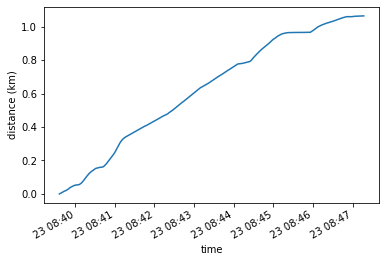

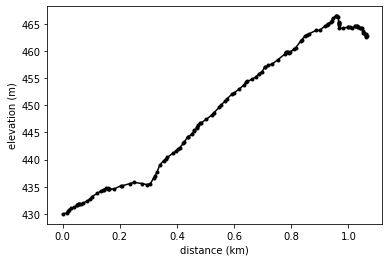

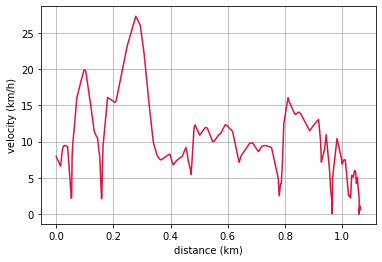

In [12]:
track.plot('td')
track.plot('dz', '.-k')
# Also returns a matplotlib axes object one can work with:
ax = track.plot('dv', c='crimson')
ax.grid()

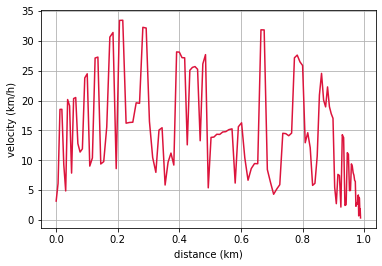

In [256]:
track.smooth(n=51)
ax = track.plot('dv', c='crimson')
ax.grid()

## mpleaflet broken - commented out from the code 

In [257]:
track.map('esri_worldtopo', embed=True)

/Users/reslr/opt/anaconda3/envs/track-rides-nb/lib/python3.9/site-packages/IPython/core/display.py:419: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [258]:
track.map(plot='scatter', c=track.elevation, cmap='plasma')

AttributeError: 'PathCollection' object has no attribute 'get_offset_position'

To fix a Problem with mplleaflet open the following file in your python env: 
- lib/python3.9/site-packages/mplleaflet/mplexporter/utils.py:241
    - Change axis._gridOnMajor -> axis._major_tick_kw['gridOn'] 
    - issue: https://github.com/jwass/mplleaflet/issues/80
    - solution: https://github.com/plotly/plotly.py/issues/2913#issuecomment-730619757



- Daten für Strecke rendern
    - Durchschnittsgeschwindigkeit
    - Höhenprofil
    - Herzfrequenz